In [75]:
import pandas as pd
import numpy as np
from scipy import stats

After importing the appropriate libraries, load the excel files to dataframes.

In [76]:
emhp_data = pd.read_excel('EMHP.xlsx')
cwp_data = pd.read_excel('CWP.xlsx')

The referred population - this analysis summarises the outcomes for the following completed cases

In [77]:
number_of_cases_emhp = emhp_data['completed_by'].value_counts()
number_of_cases_emhp

patient     936
parent_1    375
Name: completed_by, dtype: int64

In [78]:
number_of_cases_cwp = cwp_data['completed_by'].value_counts()
number_of_cases_cwp

patient     4294
parent_1    1422
staff        107
parent_2      25
Name: completed_by, dtype: int64

<b>Completed EMHP Cases</b> = 936<br>
<b>Completed CWP Cases</b> = 4294

RCADS and SDQ completions at baseline (timepoint 1)

<b>EMHP</b>

In [79]:
emhp_baseline = emhp_data.filter(items=['sdq_total_t1','rcads_tscore_anx_dep_t1'])
emhp_baseline.describe().round(2)

,sdq_total_t1,rcads_tscore_anx_dep_t1
count,497.00,364.00
mean,18.37,63.55
std,6.78,14.74
min,2.00,33.00
25%,13.00,53.00
50%,18.00,64.00
75%,24.00,74.00
max,37.00,101.00


<b>CWP</b>

In [80]:
cwp_baseline = cwp_data.filter(items=['sdq_total_t1','rcads_tscore_anx_dep_t1'])
cwp_baseline.describe().round(2)

,sdq_total_t1,rcads_tscore_anx_dep_t1
count,2450.00,2164.00
mean,17.35,63.13
std,6.76,14.96
min,0.00,32.00
25%,12.00,52.00
50%,17.00,62.00
75%,22.00,74.00
max,38.00,104.00


<b>Anxiety and Depression (RCADS)</b><br>
Looking at specific RCADS subscales for EMHP and CWP

<b>EMHP</b>

In [81]:
emhp_rcads_subscales = emhp_data.filter(items=['rcads_tscore_gad_t1','rcads_tscore_gad_t2','rcads_tscore_mdd_t1','rcads_tscore_mdd_t2','rcads_tscore_pd_t1','rcads_tscore_pd_t2','rcads_tscore_sp_t1','rcads_tscore_sp_t2'])
emhp_rcads_subscales.describe().round(2)

,rcads_tscore_gad_t1,rcads_tscore_gad_t2,rcads_tscore_mdd_t1,rcads_tscore_mdd_t2,rcads_tscore_pd_t1,rcads_tscore_pd_t2,rcads_tscore_sp_t1,rcads_tscore_sp_t2
count,369.00,257.00,381.00,299.00,368.00,253.00,367.00,265.00
mean,54.51,46.82,64.11,55.87,67.97,59.36,57.35,50.04
std,12.32,11.93,15.26,16.24,18.37,17.53,12.43,13.19
min,29.00,26.00,31.00,29.00,37.00,36.00,27.00,24.00
25%,46.00,38.00,54.00,42.00,53.75,46.00,49.00,40.00
50%,53.00,46.00,64.00,54.00,66.00,55.00,58.00,48.00
75%,64.00,54.00,74.00,65.00,80.25,69.00,67.00,58.00
max,88.00,83.00,108.00,111.00,121.00,124.00,82.00,78.00


<b>CWP</b>

In [82]:
cwp_rcads_subscales = cwp_data.filter(items=['rcads_tscore_gad_t1','rcads_tscore_gad_t2','rcads_tscore_mdd_t1','rcads_tscore_mdd_t2','rcads_tscore_pd_t1','rcads_tscore_pd_t2','rcads_tscore_sp_t1','rcads_tscore_sp_t2'])
cwp_rcads_subscales.describe().round(2)

,rcads_tscore_gad_t1,rcads_tscore_gad_t2,rcads_tscore_mdd_t1,rcads_tscore_mdd_t2,rcads_tscore_pd_t1,rcads_tscore_pd_t2,rcads_tscore_sp_t1,rcads_tscore_sp_t2
count,2188.00,1828.00,2202.00,1919.0,2188.00,1835.00,2199.00,1872.00
mean,54.61,46.80,63.58,55.4,67.77,58.39,56.74,49.29
std,12.36,12.01,15.35,16.6,18.71,17.09,12.90,13.33
min,27.00,26.00,29.00,29.0,36.00,36.00,24.00,24.00
25%,46.00,38.00,53.00,42.5,53.00,45.00,47.00,40.00
50%,53.00,46.00,63.00,54.0,66.00,54.00,57.00,48.00
75%,64.00,53.25,74.00,66.0,80.00,68.00,67.00,58.00
max,88.00,88.00,113.00,114.0,132.00,136.00,86.00,85.00


Percentage of RCADS total scores (t-scores) meeting threshold (baseline vs end of treatment)

<b>EMHP</b>

In [83]:
emhp_rcads_total_bands = emhp_data.filter(items=['rcads_band_anx_dep_t1','rcads_band_anx_dep_t2'])
emhp_rcads_total_bands.apply(pd.Series.value_counts)

,rcads_band_anx_dep_t1,rcads_band_anx_dep_t2
Normal range,189,185
High score (top 2%),130,33
Raised score (top 6%),45,12


<b>CWP</b>

In [84]:
cwp_rcads_total_bands = cwp_data.filter(items=['rcads_band_anx_dep_t1','rcads_band_anx_dep_t2'])
cwp_rcads_total_bands.apply(pd.Series.value_counts)

,rcads_band_anx_dep_t1,rcads_band_anx_dep_t2
Normal range,1184,1370
High score (top 2%),738,245
Raised score (top 6%),245,120


Now we are going to see if the differences in rcads scores pre and post treatment are significant or not

1) Inspect if there are any outliers in the rcads scores

<b>EMHP</b>

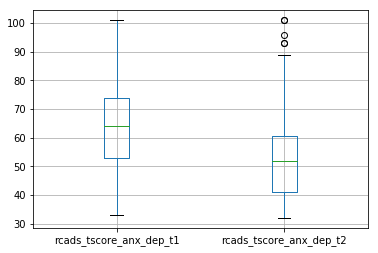

In [85]:
emhp_rcads_total = emhp_data.filter(items=['rcads_tscore_anx_dep_t1','rcads_tscore_anx_dep_t2'])
emhp_rcads_total.boxplot(column=['rcads_tscore_anx_dep_t1','rcads_tscore_anx_dep_t2'])

In [94]:
emhp_rcads_total.describe().round(2)

,rcads_tscore_anx_dep_t1,rcads_tscore_anx_dep_t2
count,364.00,230.00
mean,63.55,52.66
std,14.74,14.81
min,33.00,32.00
25%,53.00,41.00
50%,64.00,52.00
75%,74.00,60.75
max,101.00,101.00


<b>CWP</b>

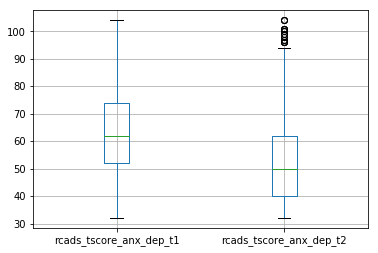

In [86]:
cwp_rcads_total = cwp_data.filter(items=['rcads_tscore_anx_dep_t1','rcads_tscore_anx_dep_t2'])
cwp_rcads_total.boxplot(column=['rcads_tscore_anx_dep_t1','rcads_tscore_anx_dep_t2'])

In [95]:
cwp_rcads_total.describe().round(2)

,rcads_tscore_anx_dep_t1,rcads_tscore_anx_dep_t2
count,2164.00,1735.00
mean,63.13,52.35
std,14.96,15.18
min,32.00,32.00
25%,52.00,40.00
50%,62.00,50.00
75%,74.00,62.00
max,104.00,104.00


2) See if the data is normally distributed. If the assumption of normality is violated, we will conduct the Wilcoxon signed-rank test. If the assumption of normality is not violated, we will conduct a paired t-test.

<b>EMHP</b>

In [96]:
emhp_rcads_total_nan = emhp_rcads_total.dropna()
stats.shapiro(emhp_rcads_total_nan['rcads_tscore_anx_dep_t1'])

(0.9898948669433594, 0.12300495058298111)

In [97]:
stats.shapiro(emhp_rcads_total_nan['rcads_tscore_anx_dep_t2'])

(0.9411731958389282, 8.27226855903973e-08)

<b>CWP</b>

In [98]:
cwp_rcads_total_nan = cwp_rcads_total.dropna()
stats.shapiro(cwp_rcads_total_nan['rcads_tscore_anx_dep_t1'])

(0.9901865124702454, 3.751555066600076e-09)

In [99]:
stats.shapiro(cwp_rcads_total_nan['rcads_tscore_anx_dep_t2'])

(0.9421924948692322, 5.354855370855238e-25)

Assumption of normality is not violated so we will conduct a paired t-test

<b>EMHP</b>

In [100]:
stats.ttest_rel(emhp_rcads_total_nan['rcads_tscore_anx_dep_t1'], emhp_rcads_total_nan['rcads_tscore_anx_dep_t2'])

Ttest_relResult(statistic=12.541828663813934, pvalue=1.3239318439737323e-27)

<b>CWP</b>

In [101]:
stats.ttest_rel(cwp_rcads_total_nan['rcads_tscore_anx_dep_t1'], cwp_rcads_total_nan['rcads_tscore_anx_dep_t2'])

Ttest_relResult(statistic=32.33779946637969, pvalue=2.0059317026798746e-178)

<b>Behavioural Problems (SDQ)</b><br>
Examining the SDQ as a measure of behavioural problems pre and post intervention

<b>EMHP</b>

In [102]:
emhp_sdq_total = emhp_data.filter(items=['sdq_total_t1','sdq_total_t2'])
emhp_sdq_total.describe().round(2)

,sdq_total_t1,sdq_total_t2
count,497.00,122.00
mean,18.37,13.15
std,6.78,6.78
min,2.00,0.00
25%,13.00,8.00
50%,18.00,12.00
75%,24.00,18.00
max,37.00,29.00


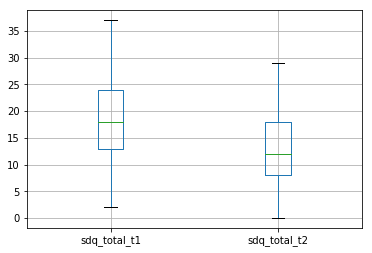

In [103]:
emhp_sdq_total.boxplot(column=['sdq_total_t1','sdq_total_t2'])

<b>CWP</b>

In [105]:
cwp_sdq_total = cwp_data.filter(items=['sdq_total_t1','sdq_total_t2'])
cwp_sdq_total.describe().round(2)

,sdq_total_t1,sdq_total_t2
count,2450.00,1045.00
mean,17.35,13.48
std,6.76,6.96
min,0.00,0.00
25%,12.00,8.00
50%,17.00,13.00
75%,22.00,18.00
max,38.00,37.00


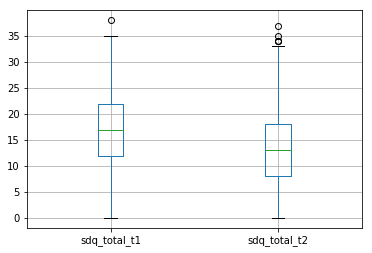

In [106]:
cwp_sdq_total.boxplot(column=['sdq_total_t1','sdq_total_t2'])

<b>EMHP</b>

In [107]:
emhp_sdq_total_nan = emhp_sdq_total.dropna()
stats.shapiro(emhp_sdq_total_nan['sdq_total_t1'])

(0.9887325763702393, 0.41578012704849243)

In [108]:
stats.shapiro(emhp_sdq_total_nan['sdq_total_t2'])

(0.9696100354194641, 0.007392715197056532)

In [109]:
stats.shapiro(emhp_sdq_total_nan)

(0.986691951751709, 0.022862929850816727)

<b>CWP</b>

In [110]:
cwp_sdq_total_nan = cwp_sdq_total.dropna()
stats.shapiro(cwp_sdq_total_nan['sdq_total_t1'])

(0.9944217205047607, 0.0006403875886462629)

In [111]:
stats.shapiro(cwp_sdq_total_nan['sdq_total_t2'])

(0.9800043702125549, 8.437484738665901e-11)

In [112]:
stats.shapiro(cwp_sdq_total_nan)

(0.9903022646903992, 1.2658321613123746e-10)

<b>EMHP</b>

In [113]:
stats.wilcoxon(emhp_sdq_total_nan['sdq_total_t1'], emhp_sdq_total_nan['sdq_total_t2'])

WilcoxonResult(statistic=994.0, pvalue=1.0172243934864483e-10)

<b>CWP</b>

In [114]:
stats.ttest_rel(cwp_sdq_total_nan['sdq_total_t1'], cwp_sdq_total_nan['sdq_total_t2'])

Ttest_relResult(statistic=21.79571265058504, pvalue=4.212817278778598e-87)

<b>Average Impact Scores (SDQ)</b>

<b>EMHP</b>

In [115]:
emhp_sdq_impact = emhp_data.filter(items=['sdq_impact_distress_t1','sdq_impact_distress_t2','sdq_impact_homelife_t1','sdq_impact_homelife_t2','sdq_impact_friendship_t1','sdq_impact_friendship_t2','sdq_impact_learning_t1','sdq_impact_learning_t2','sdq_impact_leisure_t1','sdq_impact_leisure_t2'])
emhp_sdq_impact.describe().round(2)

,sdq_impact_distress_t1,sdq_impact_distress_t2,sdq_impact_homelife_t1,sdq_impact_homelife_t2,sdq_impact_friendship_t1,sdq_impact_friendship_t2,sdq_impact_learning_t1,sdq_impact_learning_t2,sdq_impact_leisure_t1,sdq_impact_leisure_t2
count,471.00,106.00,480.00,114.00,481.00,114.00,477.00,113.00,479.00,114.00
mean,1.11,0.62,0.98,0.46,0.56,0.35,0.62,0.39,0.54,0.25
std,0.74,0.75,0.75,0.68,0.73,0.62,0.75,0.66,0.70,0.52
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


<b>CWP</b>

In [116]:
cwp_sdq_impact = cwp_data.filter(items=['sdq_impact_distress_t1','sdq_impact_distress_t2','sdq_impact_homelife_t1','sdq_impact_homelife_t2','sdq_impact_friendship_t1','sdq_impact_friendship_t2','sdq_impact_learning_t1','sdq_impact_learning_t2','sdq_impact_leisure_t1','sdq_impact_leisure_t2'])
cwp_sdq_impact.describe().round(2)

,sdq_impact_distress_t1,sdq_impact_distress_t2,sdq_impact_homelife_t1,sdq_impact_homelife_t2,sdq_impact_friendship_t1,sdq_impact_friendship_t2,sdq_impact_learning_t1,sdq_impact_learning_t2,sdq_impact_leisure_t1,sdq_impact_leisure_t2
count,2306.00,923.00,2325.00,940.00,2317.00,942.00,2309.00,940.00,2313.00,936.00
mean,1.11,0.59,0.90,0.48,0.56,0.29,0.69,0.37,0.59,0.27
std,0.75,0.70,0.76,0.65,0.72,0.57,0.79,0.64,0.74,0.55
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,2.00,1.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00
max,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00


<b>Goal Based Outcomes</b>

<b>EMHP</b>

In [125]:
emhp_gbo_t1 = emhp_data['goals_g1score_t1'].mean() + emhp_data['goals_g2score_t1'].mean() + emhp_data['goals_g3score_t1'].mean()
emhp_gbo_t1

8.158705601199589

In [126]:
emhp_gbo_t2 = emhp_data['goals_g1score_t2'].mean() + emhp_data['goals_g2score_t2'].mean() + emhp_data['goals_g3score_t2'].mean()
emhp_gbo_t2

19.590477895113658

<b>CWP</b>

In [127]:
cwp_gbo_t1 = cwp_data['goals_g1score_t1'].mean() + cwp_data['goals_g2score_t1'].mean() + cwp_data['goals_g3score_t1'].mean()
cwp_gbo_t1

7.200286541543965

In [128]:
cwp_gbo_t2 = cwp_data['goals_g1score_t2'].mean() + cwp_data['goals_g2score_t2'].mean() + cwp_data['goals_g3score_t2'].mean()
cwp_gbo_t2

19.86077920006277